# PME3481 - Controle e Aplicações

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

## Forma Linearizada

Dadas as equações não lineares deduzidas pela formualação de Newton-Euler, foi possível desenvolver as formas linearizadas com o auxílio das bibliotecas sympy e tbcontrole.

In [51]:
import numpy as np
import control as ctrl
from scipy.signal import ss2tf
import matplotlib.pyplot as plt
import sympy as sy
from tbcontrol.symbolic import routh

import warnings
warnings.filterwarnings('ignore')

In [52]:
sy.init_printing()
s = sy.Symbol('s')

### Modelo Linearizado

Lista de constantes

In [53]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [54]:
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])

B = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 1, 0, 0, 0],
              [ 0, 1, 0, 0],
              [ 0, 0, 1, 0],
              [ 0, 0, 0, 1]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0],
              [ 0, 0]])

cont = ctrl.StateSpace(A, B, C, D)

print(cont)

A = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
     [ 4.19975124e-01 -2.53575404e-03  0.00000000e+00  0.00000000e+00]
     [-9.79282123e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 5.17014925e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

B = [[  0.           0.        ]
     [  0.04247186   0.        ]
     [  0.          -9.79273731]
     [  0.         -16.09553019]]

C = [[1. 0. 0. 0.]
     [0. 1. 0. 0.]
     [0. 0. 1. 0.]
     [0. 0. 0. 1.]]

D = [[0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]]



### Funções de Transferência

In [55]:
# sys_ss = ctrl.ss(A, B, C, D)
# sys_tf = ctrl.tf(sys_ss)

In [56]:
# Get transfer function coefficients
numerator, denominator = ss2tf(A, B, C, D)

print("Numerator Coefficients:", numerator)
print("Denominator Coefficients:", denominator)

Numerator Coefficients: [[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.04247186  0.         -0.00021959  0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
Denominator Coefficients: [ 1.00000000e+00  2.53575404e-03 -5.17014925e-03 -1.31102268e-05
  0.00000000e+00]


### Polos, Frequências Naturais e Fatores de Amortecimento

In [57]:
wn, zeta, poles = cont.damp()

print("Frequências Naturais: ")
print(wn)
print("Polos: ")
print(poles)

Frequências Naturais: 
[0.00253575 0.         0.07190375 0.07190375]
Polos: 
[-0.00253575+0.j  0.        +0.j  0.07190375+0.j -0.07190375+0.j]


Abaixo há, também, o gráfico dos polos do sistema no plano complexo

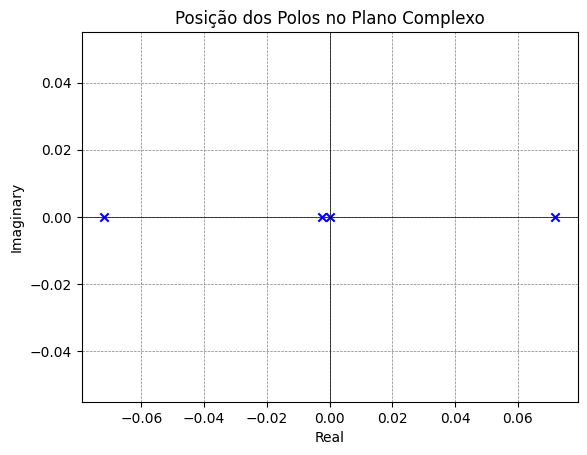

In [58]:
# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

## O Critério de Routh-Hurwitz

In [59]:
# Calcula o polinômio característico
char_poly = sy.Poly(np.poly(A), s)
# char_poly = sy.Poly(np.poly(A.ravel()), s)
char_poly

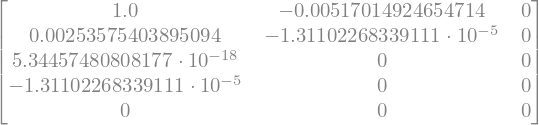

In [60]:
rhm = routh(char_poly)
rhm